## Download an image dataset of your choice for binary class classification. 
## Perform the data augmentation techniques like flipping, rotation and transformation. 
## Apply at least two object classification techniques both on the augmented 
## as well as on the original dataset.Display the performance of the Algorithms. 
## Prepare a comparison chart.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [11]:
# load the dataset
db_face_images = np.load('face_images.npz/face_images.npz')['face_images']
print(db_face_images.shape)
df_facial_keypoints = pd.read_csv('facial_keypoints.csv/facial_keypoints.csv')
pd.set_option('display.max_columns', None)

(96, 96, 7049)


In [12]:
#visualising the dataframe
df_facial_keypoints.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [13]:
#Checking for the number of NAN values row wise
nan_value = df_facial_keypoints.isnull().sum(axis = 1)
print (nan_value)

0        0
1        0
2        0
3        0
4        0
        ..
7044    22
7045    22
7046    22
7047    22
7048    22
Length: 7049, dtype: int64


#### showing Random subset of images with keypoints overlaid

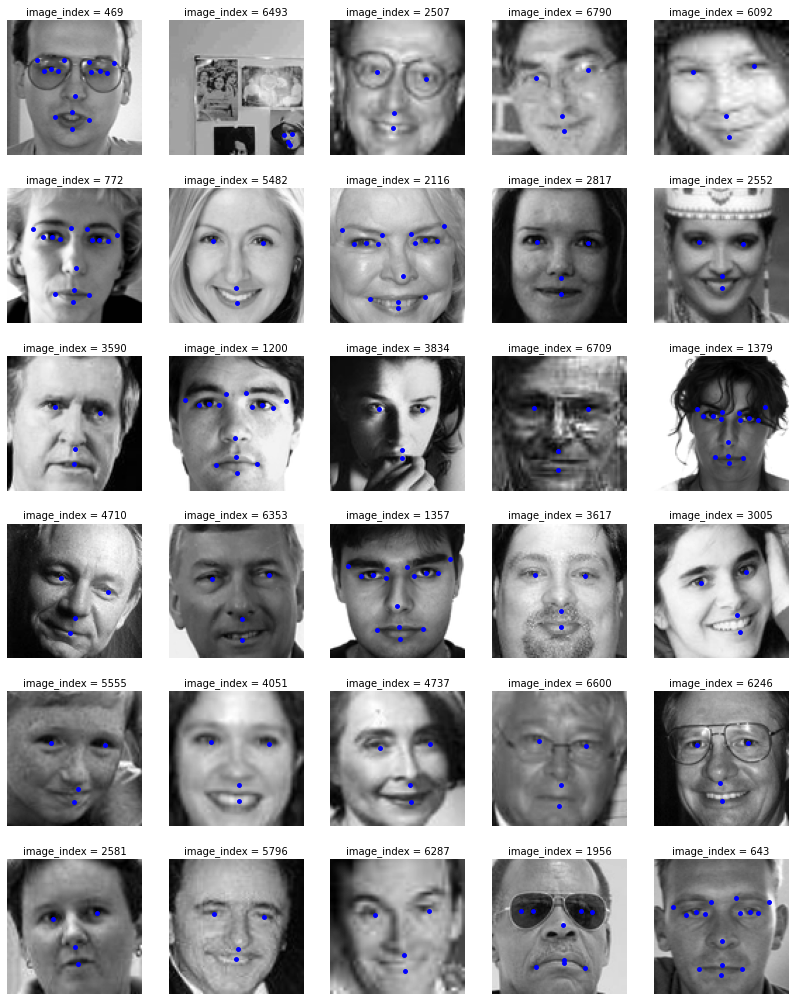

In [14]:
fig_row = 6
fig_col = 5

num_plot = fig_row * fig_col
random_indices_vector = np.random.choice(db_face_images.shape[2], num_plot, replace = False)
random_indices_mat = random_indices_vector.reshape(fig_row, fig_col)
plt.close('all')

fig, ax = plt.subplots(nrows = fig_row, ncols =fig_col, figsize = (14, 18))

for i in range(fig_row):
    for j in range(fig_col):
        curr_indice = random_indices_mat[i][j]
        curr_img = db_face_images[:,:,curr_indice]
        
        x_feature_cord = np.array(df_facial_keypoints.iloc[curr_indice, 0::2].tolist())
        y_feature_cord = np.array(df_facial_keypoints.iloc[curr_indice, 1::2].tolist())
        
        ax[i][j].imshow(curr_img, cmap = 'gray')
        ax[i][j].scatter(x_feature_cord,y_feature_cord,c='b',s=15)
        ax[i][j].set_axis_off()
        ax[i][j].set_title('image_index = %d' %(curr_indice),fontsize=10)

In [20]:
#Converting both dataset and dataframe into array for further modification

db_face_images = np.moveaxis(db_face_images, -1, 0)
db_face_images.shape

# Images are gray scale
db_images = np.asarray(db_face_images).reshape(db_face_images.shape[0],96,96,1)
print(db_images.shape)

df_keypoints = np.array(df_facial_keypoints)
print(df_keypoints.shape)

(7049, 96, 96, 1)
(7049, 30)


In [21]:
#Various Image Agumentation choices
sample = 50
horizontal_flip = True
rotation_augmentation = True
brightness_augmentation = True
shift_augmentation = True
random_noise_augmentation = True

In [22]:
#Let's create a function to plot the image
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='*', s=20)
    plt.title(title)

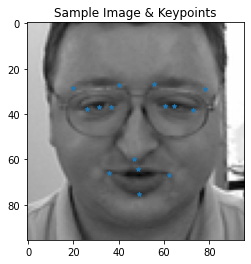

In [23]:
#Let's create a new label for images and keypoints
db_images_modify = db_images
df_keypoints_modify = df_keypoints
fig, axis = plt.subplots()
plot_sample(db_images[50], df_keypoints[50], axis, "Sample Image & Keypoints")


Shape of flipped_images: (7049, 96, 96, 1)
Shape of flipped_keypoints: (7049, 30)
Shape of images database after shifting: (14098, 96, 96, 1)
Shape of keypoints dataframe after shifting: (14098, 30)


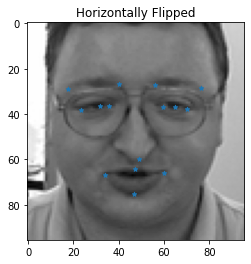

In [24]:
#Horizontal Flipping
#Function for flipping of images horizontally
def flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
    return flipped_images, flipped_keypoints

if horizontal_flip:
    db_images_flipped, df_keypoints_flipped = flip(db_images, df_keypoints)
    print("Shape of flipped_images:",np.shape(db_images_flipped))
    print("Shape of flipped_keypoints:",np.shape(df_keypoints_flipped))
    
    #Adding flipped images and keypoints to my modified dataset and dataframe
    db_images_modify = np.concatenate((db_images_modify, db_images_flipped))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_flipped))
    fig, axis = plt.subplots()
    plot_sample(db_images_flipped[sample], df_keypoints_flipped[sample], axis, "Horizontally Flipped")
    
    
print("Shape of images database after shifting:",db_images_modify.shape)
print("Shape of keypoints dataframe after shifting:",df_keypoints_modify.shape)

Shape of flipped_images: (7049, 96, 96, 1)
Shape of flipped_keypoints: (7049, 30)
Shape of images database after shifting: (21147, 96, 96, 1)
Shape of keypoints dataframe after shifting: (21147, 30)


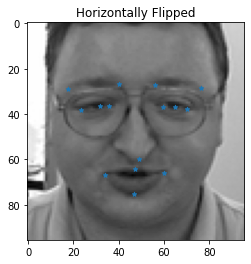

In [26]:
#Function for flipping of images horizontally
def flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
    return flipped_images, flipped_keypoints

if horizontal_flip:
    db_images_flipped, df_keypoints_flipped = flip(db_images, df_keypoints)
    print("Shape of flipped_images:",np.shape(db_images_flipped))
    print("Shape of flipped_keypoints:",np.shape(df_keypoints_flipped))
    
    #Adding flipped images and keypoints to my modified dataset and dataframe
    db_images_modify = np.concatenate((db_images_modify, db_images_flipped))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_flipped))
    fig, axis = plt.subplots()
    plot_sample(db_images_flipped[sample], df_keypoints_flipped[sample], axis, "Horizontally Flipped")
    
    
print("Shape of images database after shifting:",db_images_modify.shape)
print("Shape of keypoints dataframe after shifting:",df_keypoints_modify.shape)

In [ ]:
#Translation/shifting on images(pixels) and keypoints
pixel_shift = [12]    # shift amount in pixels (includes shift from all 4 corners)

#Function fot translation
def shift(images, keypoints):
    shifted_images = []
    shifted_keypoints = []
    for shift in pixel_shift:    # Augmenting over several pixel shift values
        for (shift_x,shift_y) in [(-shift,-shift),(-shift,shift),(shift,-shift),(shift,shift)]:
            M = np.float32([[1,0,shift_x],[0,1,shift_y]])
            for image, keypoint in zip(images, keypoints):
                shifted_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                shifted_keypoint = np.array([(point+shift_x) if idx%2==0 else (point+shift_y) for idx, point in enumerate(keypoint)])
                if np.all(0.0<shifted_keypoint) and np.all(shifted_keypoint<96.0):
                    shifted_images.append(shifted_image.reshape(96,96,1))
                    shifted_keypoints.append(shifted_keypoint)
    shifted_keypoints = np.clip(shifted_keypoints,0.0,96.0)
    return shifted_images, shifted_keypoints

if shift_augmentation:
    db_images_shifted, df_keypoints_shifted = shift(db_images, df_keypoints)
    print(f"Shape of shifted_images:",np.shape(db_images_shifted))
    print(f"Shape of shifted_keypoints:",np.shape(df_keypoints_shifted))
    
    db_images_modify = np.concatenate((db_images_modify, db_images_shifted))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_shifted))
    fig, axis = plt.subplots()
    plot_sample(db_images_shifted[sample], df_keypoints_shifted[sample], axis, "Shift Augmentation")
    
print("Shape of images database after shifting:",np.shape(db_images_modify))
print("Shape of keypoints dataframe after shifting:",np.shape(df_keypoints_modify))

In [ ]:
#Rotation on images and keypoints
from math import sin, cos, pi


rotation_angles = [12]    # Rotation angle in degrees (includes both clockwise & anti-clockwise rotations)

#Function for Rotation of the Images
def rotate(images, keypoints):
    rotated_images = []
    rotated_keypoints = []
    print("Augmenting for angles (in degrees): ")
    
    for angle in rotation_angles:    # Rotation augmentation for a list of angle values
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_rad = -angle*pi/180.     # Obtain angle in radians from angle in degrees (notice negative sign for change in clockwise vs anti-clockwise directions from conventional rotation to cv2's image rotation)
            
            # For train_images
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)
            
            # For train_keypoints
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.    # Subtract the middle value of the image dimension
                for idx in range(0,len(rotated_keypoint),2):
                    # https://in.mathworks.com/matlabcentral/answers/93554-how-can-i-rotate-a-set-of-points-in-a-plane-by-a-certain-angle-about-an-arbitrary-point
                    rotated_keypoint[idx] = rotated_keypoint[idx]*cos(angle_rad)-rotated_keypoint[idx+1]*sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*sin(angle_rad)+rotated_keypoint[idx+1]*cos(angle_rad)
                rotated_keypoint += 48.   # Add the earlier subtracted value
                rotated_keypoints.append(rotated_keypoint)
            
    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

#For more details on the transformation of the images below is the link.
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

if rotation_augmentation:
    db_images_rotated, df_keypoints_rotated = rotate(db_images, df_keypoints)
    print("\nShape of rotated_images:",np.shape(db_images_rotated))
    print("Shape of rotated_keypoints:\n",np.shape(df_keypoints_rotated))
    
    #Concatenating the train images with rotated image & train keypoints with rotated train points
    db_images_modify = np.concatenate((db_images_modify, db_images_rotated))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_rotated))
    fig, axis = plt.subplots()
    plot_sample(db_images_rotated[sample], df_keypoints_rotated[sample], axis, "Rotation Augmentation")
    
print("Shape of images database after shifting:",np.shape(db_images_modify))
print("Shape of keypoints dataframe after shifting:",np.shape(df_keypoints_modify))